In [7]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot

BATCH_SIZE = 1

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),
                                transforms.Normalize(0.5086, 0.2549)])
train_dataset = datasets.ImageFolder(root='train',
                                     transform=transform)
test_dataset = datasets.ImageFolder(root='validation',
                                    transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, 1)
        self.conv2 = nn.Conv2d(32, 64, 4, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(28224, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = f.relu(x)
        x = self.conv2(x)
        x = f.relu(x)
        x = f.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = f.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        out = f.log_softmax(x, dim=1)
        return out

In [8]:
# Initialize Model
model = torch.load('logs/run2/modelv2.pt', map_location=torch.device('cpu'))

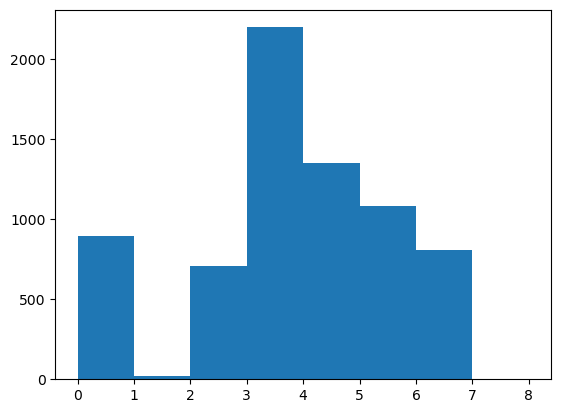

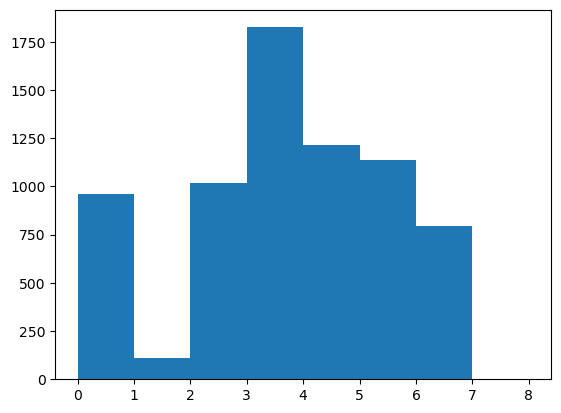

In [9]:
output_arr = []
target_arr = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data, target
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True).cpu().flatten().numpy().item()
        output_arr.append(pred)
        #print(pred)
        label = target.cpu().flatten().numpy().item()
        target_arr.append(label)
plt.hist(output_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()
plt.hist(target_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()

In [11]:
new_arr = []
for i in range(len(output_arr)): 
    new_arr.append(output_arr[i])

In [12]:
print(new_arr)

[3, 6, 0, 0, 0, 0, 3, 0, 5, 0, 4, 3, 6, 0, 0, 3, 4, 5, 3, 3, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 3, 4, 0, 2, 4, 3, 0, 3, 2, 4, 4, 0, 0, 5, 0, 5, 3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 5, 3, 0, 4, 4, 4, 4, 5, 6, 4, 5, 0, 0, 6, 5, 0, 4, 0, 5, 0, 0, 4, 0, 4, 0, 0, 3, 6, 0, 4, 0, 0, 4, 3, 5, 5, 5, 5, 4, 0, 4, 5, 5, 3, 0, 5, 2, 5, 0, 5, 3, 0, 4, 2, 4, 3, 0, 0, 4, 0, 2, 2, 5, 5, 0, 2, 3, 5, 0, 3, 4, 4, 5, 0, 5, 0, 5, 5, 3, 4, 4, 3, 4, 0, 4, 2, 0, 0, 2, 4, 0, 2, 4, 5, 5, 0, 4, 4, 0, 0, 4, 0, 4, 0, 3, 0, 6, 5, 3, 3, 4, 5, 4, 2, 0, 0, 4, 0, 0, 5, 0, 4, 5, 2, 2, 5, 3, 0, 0, 0, 0, 4, 2, 6, 6, 5, 4, 0, 4, 4, 3, 3, 3, 0, 0, 0, 2, 0, 3, 4, 5, 4, 5, 0, 4, 0, 3, 0, 5, 3, 5, 0, 4, 4, 0, 3, 5, 0, 0, 3, 0, 5, 2, 0, 3, 0, 5, 5, 0, 3, 4, 5, 0, 5, 6, 6, 2, 0, 0, 3, 5, 0, 0, 3, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 3, 0, 2, 0, 0, 2, 4, 0, 0, 4, 4, 4, 2, 0, 3, 4, 4, 0, 3, 2, 4, 0, 6, 0, 4, 0, 4, 2, 0, 2, 2, 0, 3, 2, 0, 2, 0, 5, 5, 0, 2, 4, 3, 5, 2, 4, 6, 0, 0, 5, 0, 3, 0, 5, 3, 0, 5, 2, 4, 0, 3, 0, 3, 

(array([ 897.,   20.,  706., 2200., 1349., 1086.,  808.,    0.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

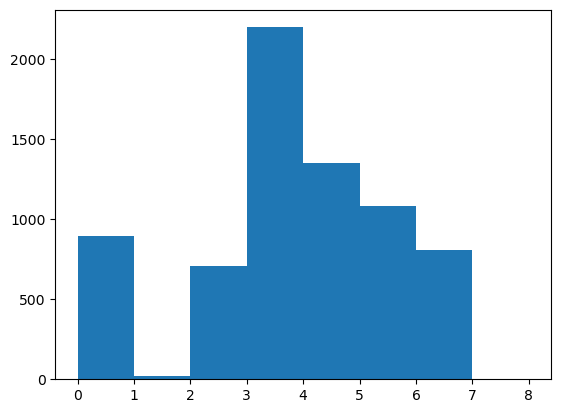

In [13]:
plt.hist(new_arr, [0, 1, 2, 3, 4, 5, 6, 7, 8])


In [24]:
input, labels = next(iter(test_loader))
print(input)
y = model(input)
#make_dot(y, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)


tensor([[[[-1.1030, -0.9799, -0.9184,  ..., -1.2107, -1.2722, -1.4568],
          [-1.0414, -1.0107, -0.8722,  ..., -1.0876, -1.2107, -1.3491],
          [-0.9799, -0.9337, -0.6568,  ..., -1.1030, -1.1645, -1.1799],
          ...,
          [-1.8722, -1.7645, -1.7030,  ..., -1.9184, -1.8876, -1.8722],
          [-1.9030, -1.7799, -1.7338,  ..., -1.9338, -1.8876, -1.8414],
          [-1.8722, -1.7645, -1.6876,  ..., -1.9184, -1.8876, -1.8568]]]])
